In [9]:
import seaborn as sns
import pandas as pd
import re
import matplotlib as mpl
from matplotlib import rc
import missingno as msno
import warnings
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

In [10]:
final_df = pd.read_csv('../../final_df_11/final_df_11.csv').drop(columns='Unnamed: 0')

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 925 non-null    object 
 1   director              925 non-null    object 
 2   distributor           925 non-null    object 
 3   distributor_group     925 non-null    object 
 4   release_date          925 non-null    object 
 5   release_season        925 non-null    object 
 6   release               925 non-null    object 
 7   form                  925 non-null    object 
 8   nation                925 non-null    object 
 9   screen                925 non-null    int64  
 10  rev_nationwide        925 non-null    float64
 11  aud_nationwide        925 non-null    int64  
 12  rev_seoul             925 non-null    int64  
 13  rev_seoul.1           925 non-null    int64  
 14  genre                 925 non-null    object 
 15  rate                  9

In [12]:
X = final_df.drop(columns=['aud_nationwide', 'log_aud'])
y = final_df[['aud_nationwide', 'log_aud']]

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
X_train.to_csv('X_train_11.csv')
X_test.to_csv('X_test_11.csv')
y_train.to_csv('y_train_11.csv')
y_test.to_csv('y_test_11.csv')

In [20]:
len(y_test)

185

In [22]:
df = pd.concat([X_train, y_train], axis=1)

In [26]:
df.head(1)

,title,director,distributor,distributor_group,release_date,release_season,release,form,nation,screen,...,realease_year,director_power,sequel,original,actor_power,director_count,director_movie_count,actor_movie_count,aud_nationwide,log_aud
107,인사이드 아웃,피트 닥터,월트디즈니컴퍼니코리아(주),B,7/9/2015,summer,개봉영화,장편,미국,777,...,2015,0,0,0,0,1,0,0,4968687,15.418666


In [27]:
group_a = ['씨제이이앤엠(주)', '메가박스중앙(주)플러스엠', 'CGV아트하우스', '롯데쇼핑㈜롯데엔터테인먼트',
           'CGV아트하우스,(주)대명문화공장', '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트',
           'CGV아트하우스,(주)리틀빅픽쳐스', 'CGV아트하우스,영화사 풀', '메가박스중앙(주)플러스엠,(주)키위미디어그룹',
           '롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스', '메가박스중앙(주)플러스엠,주식회사 키위컴퍼니',
           '씨제이 씨지브이(CJ CGV)(주)', '롯데컬처웍스(주)롯데엔터테인먼트',
           '롯데컬처웍스(주)롯데엔터테인먼트,씨네그루(주)키다리이엔티', '메가박스중앙(주)플러스엠,(주)콘텐츠 난다긴다',
           '씨제이이앤엠(주),(주)덱스터스튜디오', '(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스,(주)와우픽쳐스',
           '(주)넥스트엔터테인먼트월드(NEW),(주)팬엔터테인먼트']
group_b = ['월트디즈니컴퍼니코리아(주)', '이십세기폭스코리아(주)', '유니버설픽쳐스인터내셔널 코리아(유)',
           '워너브러더스 코리아(주)', '씨네그루(주)다우기술', '(주)이수C&E', '(주)티캐스트',
           '씨네그루(주)키다리이엔티', '월트디즈니컴퍼니코리아 유한책임회사', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
           '(주)이수C&E,(주)스톰픽쳐스코리아', '씨네그루(주)키다리이엔티,주식회사 키위컴퍼니',
           '(주)이수C&E,(주)에이원엔터테인먼트', '씨네그루(주)키다리이엔티,(주)삼백상회',
           '(주)이수C&E,(주)시너지미디어', '(주)셀트리온엔터테인먼트', '케이티하이텔(주)']

In [28]:
df['dist_cat'] = df['distributor']

for a in group_a:
    df['dist_cat'] = df['dist_cat'].replace(a, 'A')

for b in group_b:
    df['dist_cat'] = df['dist_cat'].replace(b, 'B')

df['dist_cat'] = df['dist_cat'].apply(
    lambda data: "C" if data != 'A' and data != 'B' else data)

In [29]:
X_test['dist_cat'] = X_test['distributor']

for a in group_a:
    X_test['dist_cat'] = X_test['dist_cat'].replace(a, 'A')

for b in group_b:
    X_test['dist_cat'] = X_test['dist_cat'].replace(b, 'B')

X_test['dist_cat'] = X_test['dist_cat'].apply(
    lambda data: "C" if data != 'A' and data != 'B' else data)

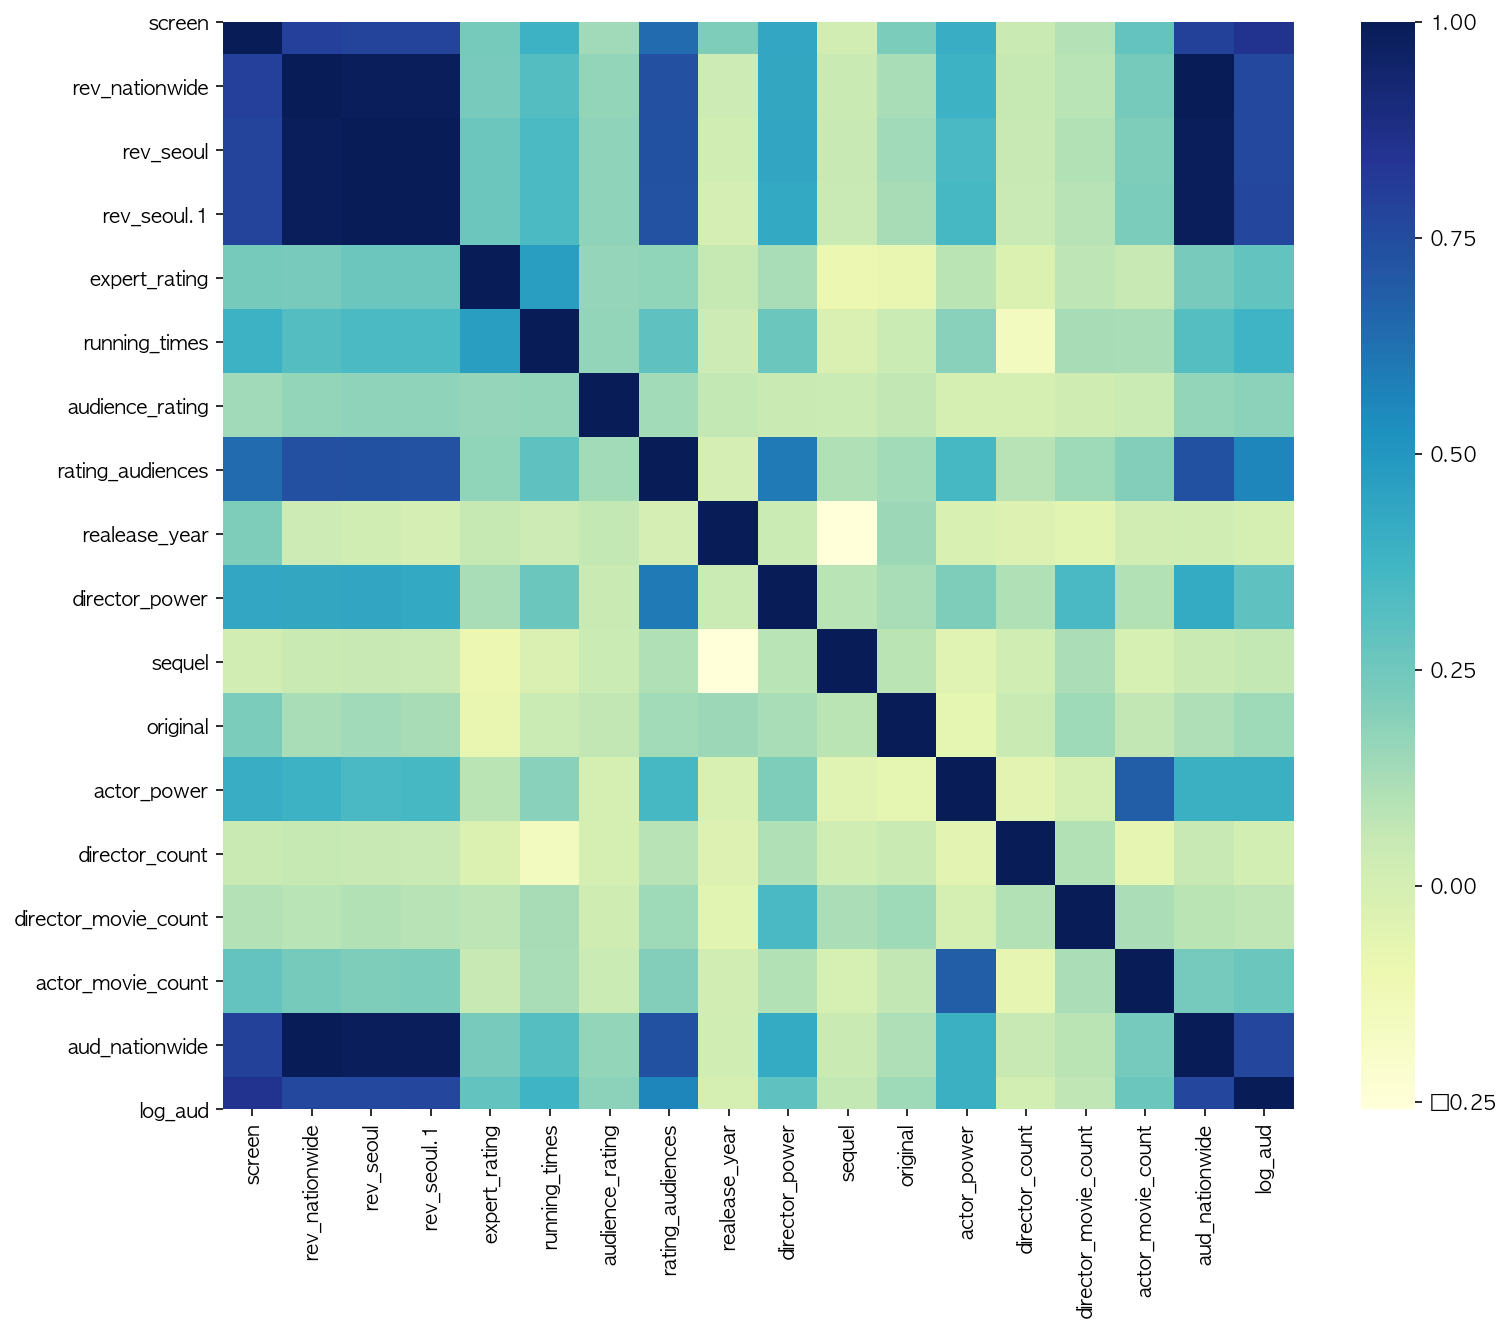

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()